# Week 10 Hand-in

## Assignment

https://github.com/Hartmannsolution/docker_notebooks/blob/master/notebooks/12Exercise.ipynb

## Status


# Imports

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Part 1

Image shape (1678, 1828, 3) Thresh (1678, 1828) [  0 254 255]


<Figure size 432x288 with 0 Axes>

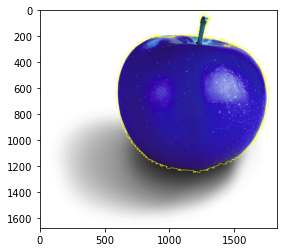

<Figure size 432x288 with 0 Axes>

In [46]:


img = cv2.imread('images/apple3.jpg', 1)

# convert the image to HSV color space
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# find Otsu threshold on hue and saturation channel
ret, thresh_H = cv2.threshold(img_hsv[:,:,0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret, thresh_S = cv2.threshold(img_hsv[:,:,1], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# some morphology operation to clear unwanted spots
kernel = np.ones((5, 5), np.uint8)
thresh = thresh_H + thresh_S
print('Image shape',img_hsv.shape,'Thresh',thresh.shape,np.unique(thresh))
img_dilated = cv2.dilate(thresh, kernel, iterations = 1)

# find contours on the result above
(contours, hierarchy) = cv2.findContours(img_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# draw yellow contour
im1 = img.copy()
for c in contours:
    cv2.drawContours(im1, contours=[c], contourIdx=-1, color=(255,255,0),thickness=2)
plt.imshow(im1)
plt.figure()

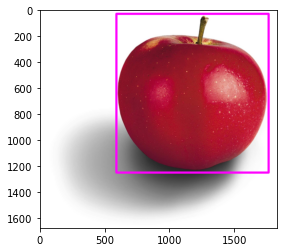

In [47]:
for contour in contours:     
    # Find bounding rectangles     
    x,y,w,h = cv2.boundingRect(contour)     
    # Draw the rectangle     
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)     
    draw_img = img_rgb.copy()        
    # Make a copy of the image     
    cv2.rectangle(draw_img,(x,y),(x+w,y+h),(255,0,255),thickness=15)             
    # show the image  
    plt.imshow(draw_img)

Image shape (500, 500, 3) Thresh (500, 500) [  0 254 255]
There are 2 apples


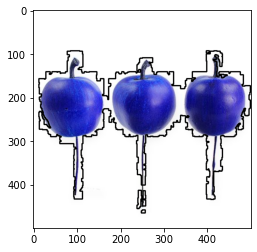

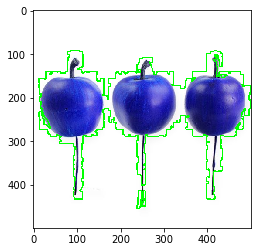

In [49]:
img = cv2.imread('images/apples1.png', 1)

# convert the image to HSV color space
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# find Otsu threshold on hue and saturation channel
ret, thresh_H = cv2.threshold(img_hsv[:,:,0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret, thresh_S = cv2.threshold(img_hsv[:,:,1], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# some morphology operation to clear unwanted spots
kernel = np.ones((5, 5), np.uint8)
thresh = thresh_H + thresh_S
print('Image shape',img_hsv.shape,'Thresh',thresh.shape,np.unique(thresh))
img_dilated = cv2.dilate(thresh, kernel, iterations = 1)

# find contours on the result above
(contours, hierarchy) = cv2.findContours(img_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
im1 = img.copy()
for c in contours:
    cv2.drawContours(im1, contours=[c], contourIdx=-1, color=(0,0,0),thickness=2)
plt.imshow(im1)
plt.figure()

# since there were few small contours found, retain only those above a certain area above 500 pixels
im2 = img.copy()
count = 0
for c in contours:
    if cv2.contourArea(c) > 500:
        count+=1
        cv2.drawContours(im2, [c], -1, (0, 255, 0), 2)

plt.imshow(im2, interpolation='none')
print(f'There are {count} apples')